In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [45]:
df = pd.read_csv('/Users/kkkka/Desktop/汉阳区二手房1.csv')

In [46]:
# 定义特征列和目标列
feature_cols = [ '户型', '面积', '朝向', '楼层']  
target_col = '单价'  
  
# 分离特征和目标  
X = df[feature_cols]  
y = df[target_col]  
  
# 对数值特征（'面积'）进行标准化
numeric_features = ['面积']  
numeric_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())  
])  
  
# 对分类特征进行独热编码  
categorical_features = ['户型', '朝向', '楼层']  
categorical_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])  
  
# 合并数值和分类特征的转换器  
preprocessor = ColumnTransformer(  
    transformers=[  
        ('num', numeric_transformer, numeric_features),  
        ('cat', categorical_transformer, categorical_features)  
    ])  

In [47]:
# 拟合并转换特征
X_preprocessed = preprocessor.fit_transform(X)

In [48]:
# 设定聚类的数量（这里假设我们想要3个簇）
n_clusters = 4

In [49]:
# 训练K-Means模型
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(X_preprocessed)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
# 将聚类结果添加到DataFrame中
df['cluster'] = clusters

In [51]:
# 评估聚类质量
silhouette_avg = silhouette_score(X_preprocessed, clusters)
print(f"Silhouette Coefficient: {silhouette_avg}")

Silhouette Coefficient: 0.32587109847049844


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


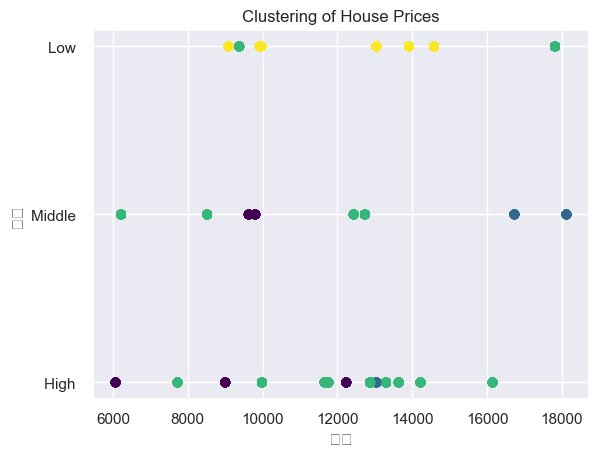

In [52]:
# 假设我们仅使用area和floor进行简单的二维可视化
plt.scatter(df['单价'], df['楼层'], c=df['cluster'], cmap='viridis')
plt.xlabel('单价')
plt.ylabel('楼层')
plt.title('Clustering of House Prices')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


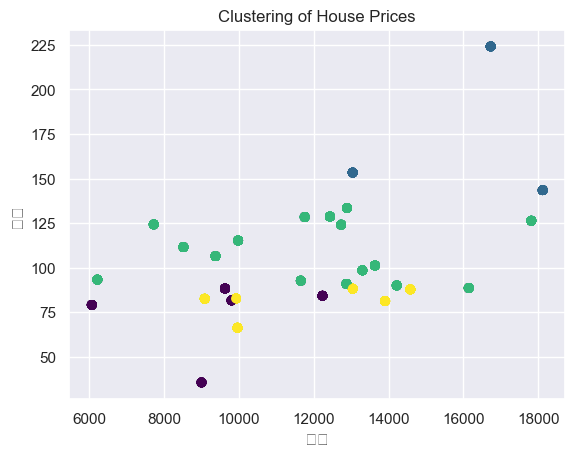

In [53]:
plt.scatter(df['单价'], df['面积'], c=df['cluster'], cmap='viridis')
plt.xlabel('单价')
plt.ylabel('面积')
plt.title('Clustering of House Prices')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26397 (\N{CJK UNIFIED IDEOGRAPH-671D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


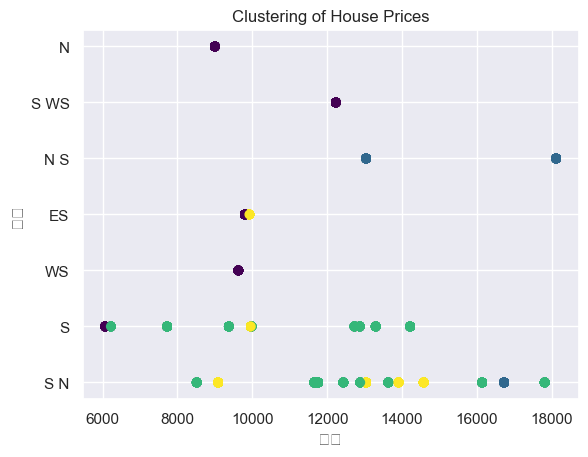

In [54]:
plt.scatter(df['单价'], df['朝向'], c=df['cluster'], cmap='viridis')
plt.xlabel('单价')
plt.ylabel('朝向')
plt.title('Clustering of House Prices')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


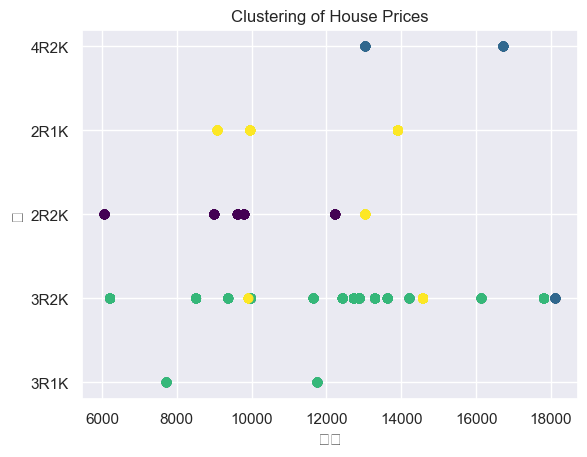

In [55]:
plt.scatter(df['单价'], df['户型'], c=df['cluster'], cmap='viridis')
plt.xlabel('单价')
plt.ylabel('户')
plt.title('Clustering of House Prices')
plt.show()

In [56]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  f.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  f.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  f.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from current font.
  f.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-pa

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: U

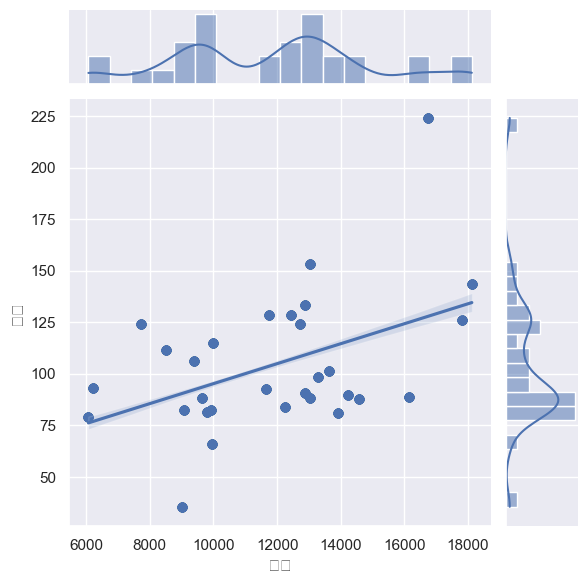

In [57]:
sns.jointplot(x='单价',y='面积',data=df,kind='reg')

/var/folders/7y/7gc506n92516thxfkcqtq78w0000gn/T/ipykernel_71688/3023233008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.单价,bins=30,kde=True,rug=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with 

<Axes: xlabel='单价', ylabel='Density'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


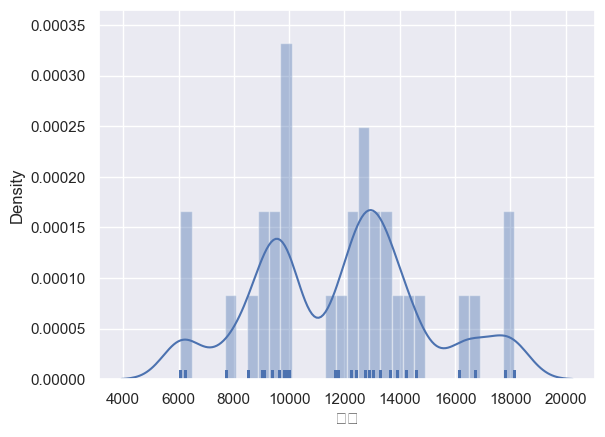

In [58]:
sns.set(style='darkgrid',color_codes=False)
sns.distplot(df.单价,bins=30,kde=True,rug=True)